In [1]:
import os, shutil

base_dir = 'imgs'

# 分别对应训练、验证和测试目录
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')

# ===============================================
train_arc_dir = os.path.join(train_dir, 'arc')
train_ctj_dir = os.path.join(train_dir, 'ctj')
train_lky_dir = os.path.join(train_dir, 'lky')

validation_arc_dir = os.path.join(validation_dir, 'arc')
validation_ctj_dir = os.path.join(validation_dir, 'ctj')
validation_lky_dir = os.path.join(validation_dir, 'lky')

test_arc_dir = os.path.join(test_dir, 'arc')
test_ctj_dir = os.path.join(test_dir, 'ctj')
test_lky_dir = os.path.join(test_dir, 'lky')

In [2]:
# 检查每个图像数组的形状

import PIL.Image as Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.io import loadmat

tmp_path = validation_arc_dir + '/478.jpg'
tmp_img = Image.open(tmp_path)
#tmp_img.show()
tmp_img_array = np.array(tmp_img)
print('Image array shape:', tmp_img_array.shape)

Image array shape: (57, 250, 3)


In [3]:
# 检查每个分组包含多少图像
print('========================================')
print('total training arc images:', len(os.listdir(train_arc_dir)))
print('total training ctj images:', len(os.listdir(train_ctj_dir)))
print('total training lky images:', len(os.listdir(train_lky_dir)))
print('----------------------------------------')
print('total validation arc images:', len(os.listdir(validation_arc_dir)))
print('total validation ctj images:', len(os.listdir(validation_ctj_dir)))
print('total validation lky images:', len(os.listdir(validation_lky_dir)))
print('----------------------------------------')
print('total test arc images:', len(os.listdir(test_arc_dir)))
print('total test ctj images:', len(os.listdir(test_ctj_dir)))
print('total test lky images:', len(os.listdir(test_lky_dir)))
print('========================================')

total training arc images: 478
total training ctj images: 226
total training lky images: 456
----------------------------------------
total validation arc images: 102
total validation ctj images: 49
total validation lky images: 89
----------------------------------------
total test arc images: 102
total test ctj images: 49
total test lky images: 98


In [15]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(57, 250, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 55, 248, 32)       896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 27, 124, 32)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 25, 122, 64)       18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 59, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 29, 128)      

In [16]:
from keras import optimizers

# 编译
model.compile(optimizer = optimizers.RMSprop(lr=1e-4),
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [17]:
from keras.preprocessing.image import ImageDataGenerator

# 对训练数据进行数据增强，并乘以1/255缩放
train_datagen = ImageDataGenerator(rescale=1./255,
                                  #rotation_range=40,
                                  #width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  #shear_range=0.2,
                                  #zoom_range=0.2,
                                  horizontal_flip=True,)

# 不能增强验证数据，只乘以1/255缩放
test_datagen = ImageDataGenerator(rescale=1./255)

# 训练集生成器
train_generator = train_datagen.flow_from_directory(
        train_dir,                  # 目标目录
        target_size=(57,250),       # 调整图像大小
        batch_size=20,
        class_mode='categorical')

# 验证集生成器
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(57,250),
        batch_size=20,
        class_mode='categorical')

Found 1160 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


In [18]:
# 利用批量生成器拟合模型
history = model.fit_generator(
      train_generator,
      steps_per_epoch=58,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=8)

Epoch 1/20


/tmp/ipykernel_22454/1056940645.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


58/58 [==============================] - 4s 71ms/step - loss: 0.9523 - accuracy: 0.5767 - val_loss: 0.6050 - val_accuracy: 0.7812
Epoch 2/20
58/58 [==============================] - 4s 68ms/step - loss: 0.6533 - accuracy: 0.7509 - val_loss: 0.3654 - val_accuracy: 0.8875
Epoch 3/20
58/58 [==============================] - 4s 68ms/step - loss: 0.5864 - accuracy: 0.7586 - val_loss: 0.3294 - val_accuracy: 0.8813
Epoch 4/20
58/58 [==============================] - 4s 69ms/step - loss: 0.5184 - accuracy: 0.7767 - val_loss: 0.2895 - val_accuracy: 0.9375
Epoch 5/20
58/58 [==============================] - 4s 69ms/step - loss: 0.4894 - accuracy: 0.7940 - val_loss: 0.2293 - val_accuracy: 0.9563
Epoch 6/20
58/58 [==============================] - 4s 68ms/step - loss: 0.4459 - accuracy: 0.8095 - val_loss: 0.3116 - val_accuracy: 0.8562
Epoch 7/20
58/58 [==============================] - 4s 69ms/step - loss: 0.4053 - accuracy: 0.8276 - val_loss: 0.1777 - val_accuracy: 0.9688
Epoch 8/20
58/58 [======

In [21]:
# 保存模型
model.save('cnn_model_imgs_hori_height.h5')

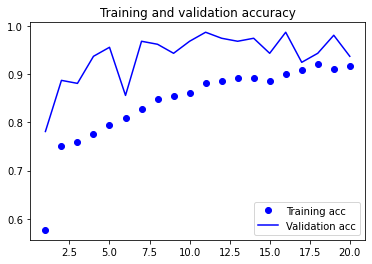

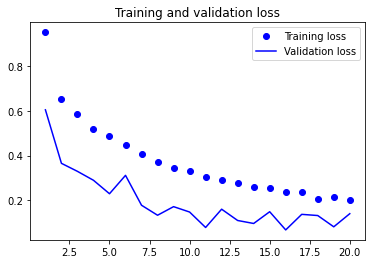

In [20]:
# 绘制训练过程中的损失曲线和精度曲线

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()